# 1. Data Collection and Manipulation

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd

folder_path = "./archive/"

In [2]:
# Create a df with labels and corresponding image name
csv_file_name = "Training_set.csv"
df = pd.read_csv(os.path.join(folder_path, csv_file_name))
display(df)

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
...,...,...
6494,Image_6495.jpg,MANGROVE SKIPPER
6495,Image_6496.jpg,MOURNING CLOAK
6496,Image_6497.jpg,APPOLLO
6497,Image_6498.jpg,ELBOWED PIERROT


In [ ]:
# Check if the image format is valid and verify if TensorFlow can load the image, otherwise mark it as invalid.

images_path = "train"
images_folder_path = os.path.join(folder_path, images_path)
invalid_images = []
dataset = []
target_size = (224, 224)

for filename in df['filename']:
    file_path = os.path.join(images_folder_path, filename)
    print(filename)
    if os.path.isfile(file_path):
        
        # Check if the file extension is a supported image format
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            print(f"Invalid Extension for {filename}.")
            invalid_images.append(filename)
            continue

        # Try loading and preprocessing the image
        try:
            img = tf.keras.preprocessing.image.load_img(file_path)  # Load the image
            img = img.resize(target_size)  # Resize to the target dimensions
            numeric_img = tf.keras.preprocessing.image.img_to_array(img)  # Convert image to a numeric array
            numeric_img = numeric_img / 255.  # Normalize pixel values to range [0, 1]
            dataset.append(numeric_img)  # Add the preprocessed image to the dataset
        except Exception as e:
            print(f"Error loading {filename}: {e}.")
            invalid_images.append(filename)
    else:
        print(f"Skipping {filename}, not a file.")
print("images checked")
dataset_np = np.array(dataset)

print()
print("Invalid images list:", invalid_images)

# Update the df with valid images only

df = df[~df['filename'].isin(invalid_images)].reset_index(drop=True)

#-------------------------------------------------------------------
# Delete invalid images from disk (uncomment to enable deletion)

# for invalid_file in invalid_images:
#     file_path = os.path.join(images_folder_path, invalid_file)
#     try:
#         os.remove(file_path)
#         print(f"Deleted: {invalid_file}")
#     except Exception as e:
#         print(f"Failed to delete {invalid_file}: {e}")

Image_1.jpg
Image_2.jpg
Image_3.jpg
Image_4.jpg
Image_5.jpg
Image_6.jpg
Image_7.jpg
Image_8.jpg
Image_9.jpg
Image_10.jpg
Image_11.jpg
Image_12.jpg
Image_13.jpg
Image_14.jpg
Image_15.jpg
Image_16.jpg
Image_17.jpg
Image_18.jpg
Image_19.jpg
Image_20.jpg
Image_21.jpg
Image_22.jpg
Image_23.jpg
Image_24.jpg
Image_25.jpg
Image_26.jpg
Image_27.jpg
Image_28.jpg
Image_29.jpg
Image_30.jpg
Image_31.jpg
Image_32.jpg
Image_33.jpg
Image_34.jpg
Image_35.jpg
Image_36.jpg
Image_37.jpg
Image_38.jpg
Image_39.jpg
Image_40.jpg
Image_41.jpg
Image_42.jpg
Image_43.jpg
Image_44.jpg
Image_45.jpg
Image_46.jpg
Image_47.jpg
Image_48.jpg
Image_49.jpg
Image_50.jpg
Image_51.jpg
Image_52.jpg
Image_53.jpg
Image_54.jpg
Image_55.jpg
Image_56.jpg
Image_57.jpg
Image_58.jpg
Image_59.jpg
Image_60.jpg
Image_61.jpg
Image_62.jpg
Image_63.jpg
Image_64.jpg
Image_65.jpg
Image_66.jpg
Image_67.jpg
Image_68.jpg
Image_69.jpg
Image_70.jpg
Image_71.jpg
Image_72.jpg
Image_73.jpg
Image_74.jpg
Image_75.jpg
Image_76.jpg
Image_77.jpg
Image_78

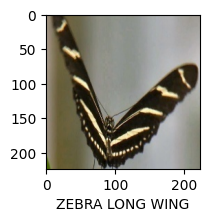

In [10]:
# check on dataset 
img_idex = 5314
plt.figure(figsize=(2, 2)) 
plt.imshow(dataset_np[img_idex])
plt.xlabel(df.loc[img_idex, 'label'])
plt.show()